In [110]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.ticker as mtick


In [112]:
df= pd.read_csv('Customer_Transactions.csv')
print(df.head())

              tranDate          custName           cardNum  zipCode  \
0  2023-09-15 20:32:41    Catherine Bell  2294637276392057     8642   
1  2023-05-16 23:18:37     Parker Riddle   342160763812707    80349   
2  2023-09-11 18:38:23      Brenda Baird  4137641055044779    34346   
3  2023-08-04 21:42:37   Kimberly Carter  3546070762859922    47715   
4  2023-09-22 08:27:40  Daniel Rodriguez   213170012973743    77790   

   tranAmount  
0         848  
1         574  
2         600  
3         583  
4        3636  


 # Apply EDA

In [114]:
df.info

<bound method DataFrame.info of                  tranDate          custName              cardNum  zipCode  \
0     2023-09-15 20:32:41    Catherine Bell     2294637276392057     8642   
1     2023-05-16 23:18:37     Parker Riddle      342160763812707    80349   
2     2023-09-11 18:38:23      Brenda Baird     4137641055044779    34346   
3     2023-08-04 21:42:37   Kimberly Carter     3546070762859922    47715   
4     2023-09-22 08:27:40  Daniel Rodriguez      213170012973743    77790   
...                   ...               ...                  ...      ...   
5495  2024-01-18 01:08:01       Luke Garner      180059140353879    71470   
5496  2023-12-07 02:26:00    Darrell Vargas     3578703731370362    86141   
5497  2023-08-30 23:21:48       Ricky Smith      376357770060994    31935   
5498  2023-12-18 02:35:29    Raymond Garcia       30071114876795    69219   
5499  2023-12-24 21:47:48      Brett Tucker  4970134866497942923    27947   

      tranAmount  
0            848  
1    

In [136]:
df['tranDate'] = pd.to_datetime(df['tranDate'])

In [138]:
df.describe(include='all')

,tranDate,custName,cardNum,zipCode,tranAmount
count,5500,5500,5.500000e+03,5500.000000,5500.000000
unique,NaN,5294,NaN,NaN,NaN
top,NaN,Michael Smith,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN
mean,2023-09-17 22:05:47.974727424,NaN,4.025768e+17,50776.016000,2515.238545
min,2023-03-17 15:26:17,NaN,6.040092e+10,569.000000,100.000000
25%,2023-06-19 00:44:57.500000,NaN,1.800016e+14,26091.250000,1301.750000
50%,2023-09-19 02:37:02.500000,NaN,3.514299e+15,51115.500000,2504.000000
75%,2023-12-20 05:32:45.249999872,NaN,4.588197e+15,75730.000000,3728.500000
max,2024-03-16 15:11:06,NaN,4.998644e+18,99944.000000,4999.000000


In [140]:
df['cardNum'] = df['cardNum'].astype(str)
df['zipCode'] = df['zipCode'].astype(str)

In [160]:
print(df.isnull().sum())

tranDate      0
custName      0
cardNum       0
zipCode       0
tranAmount    0
dtype: int64


# Transaction Trends Over Time

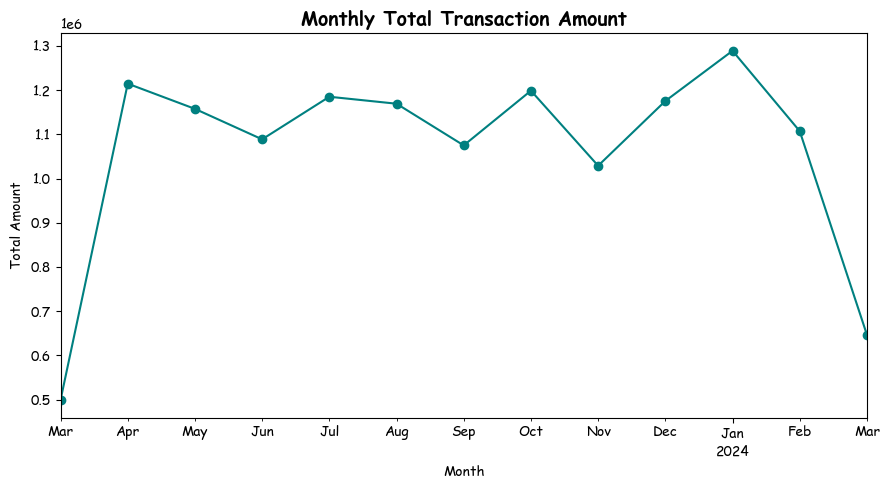

In [155]:
monthly_trend.plot(kind='line', figsize=(9, 5), color='teal', marker='o')
plt.title('Monthly Total Transaction Amount', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

# Repeat Customers

In [124]:

repeat_customers = df['custName'].value_counts()
print(repeat_customers[repeat_customers > 1])

custName
Michael Smith       5
Anthony Brown       5
Michael Williams    3
Michael Anderson    3
Ryan Smith          3
                   ..
Matthew Phillips    2
Ashley Hernandez    2
Maria Davis         2
Samantha Miller     2
Matthew Palmer      2
Name: count, Length: 181, dtype: int64


# High-Value Transactions

In [127]:
high_value = df[df['tranAmount'] > 4000]
print(high_value.sort_values(by='tranAmount', ascending=False))

                 tranDate           custName              cardNum  zipCode  \
5023  2023-03-23 06:43:23       Morgan Davis      213181400065711    71994   
5024  2023-04-06 14:53:52     Kristine Avery     6011317498279985    66921   
1541  2023-11-11 14:48:39        Julie Colon  4050288238661046573    58648   
606   2023-11-19 09:31:06  Christian Miranda        4076628384287    77490   
1497  2024-03-10 03:26:36     Andrea Johnson     5116433132826663    43214   
...                   ...                ...                  ...      ...   
4368  2023-04-08 22:33:01     William Clarke  4432625516023989685    80986   
518   2023-09-01 19:57:35         Chad Zhang     4086829643090963    74926   
2620  2023-03-31 10:56:03         Jacob Rice     6011845243105394    96054   
4799  2023-09-13 11:12:51     Mrs. Jill Lowe       30436614068138    44060   
437   2023-03-28 06:09:42         Beth Costa     2284241209790123    48021   

      tranAmount  
5023        4999  
5024        4998  
1541  

# Transaction Amount Distribution

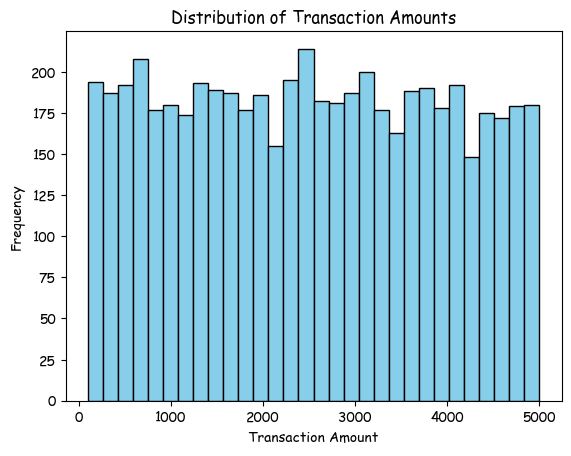

In [130]:
import matplotlib.pyplot as plt
plt.hist(df['tranAmount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()
